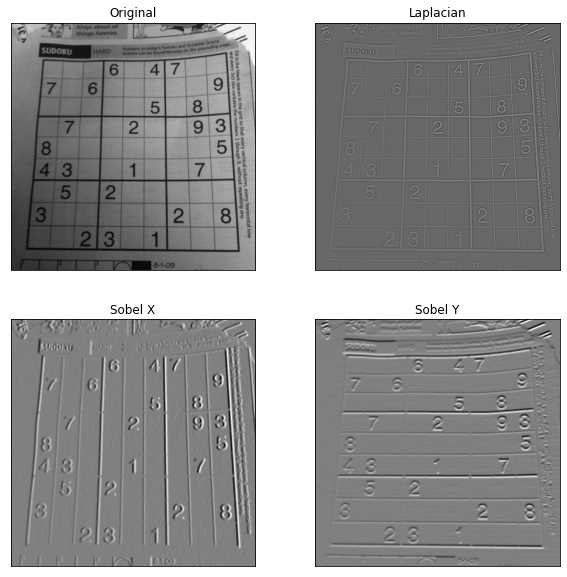

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('s3.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.figure(figsize=(10,10), facecolor='white')
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


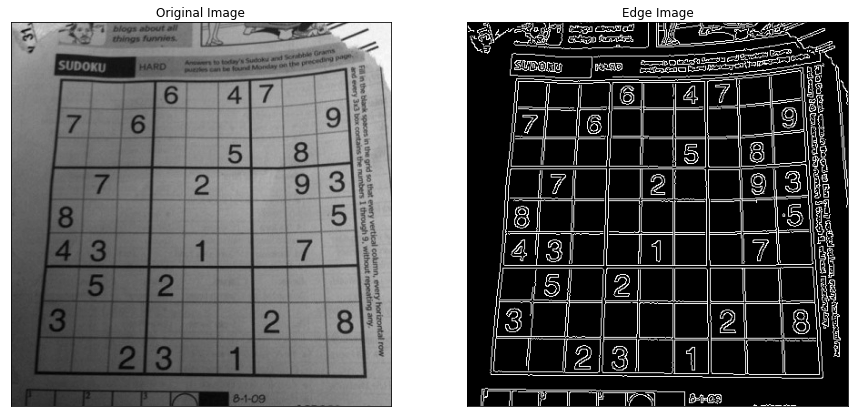

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('s3.jpg',0)
edges = cv2.Canny(img,50,100)
plt.figure(figsize=(15,15), facecolor='white')
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


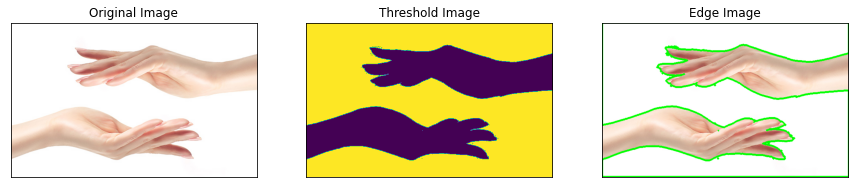

In [51]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
im = cv2.imread('pp1.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
img=im.copy()
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(imgray,250,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contours, -1, (0,255,0), 3)

plt.figure(figsize=(15,15), facecolor='white')

plt.subplot(131),plt.imshow(im)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(thresh)
plt.title('Threshold Image'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(img)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [55]:
import cv2
import numpy as np
img = cv2.imread('kk1.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(M,cx,cy)
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)


{'m00': 31016.0, 'm10': 13230446.0, 'm01': 9086229.5, 'm20': 5804755427.333333, 'm11': 4009582611.1666665, 'm02': 2825931228.1666665, 'm30': 2615062800117.8003, 'm21': 1818589960863.7832, 'm12': 1288758445465.5166, 'm03': 928064195832.3501, 'mu20': 161065030.15394115, 'mu11': 133684083.20184135, 'mu02': 164093256.58199215, 'mu30': 1526960795.4902344, 'mu21': 4018768838.887291, 'mu12': 4979136885.724976, 'mu03': 4056017222.8604736, 'nu20': 0.16742861405522705, 'nu11': 0.13896586211380205, 'nu02': 0.17057648391505573, 'nu30': 0.00901287642973385, 'nu21': 0.02372075763276385, 'nu12': 0.029389323950102717, 'nu03': 0.023940615983383647} 426 292


31016.0 1234.2438480854034 [[[253 220]]

 [[617 468]]

 [[396 161]]]


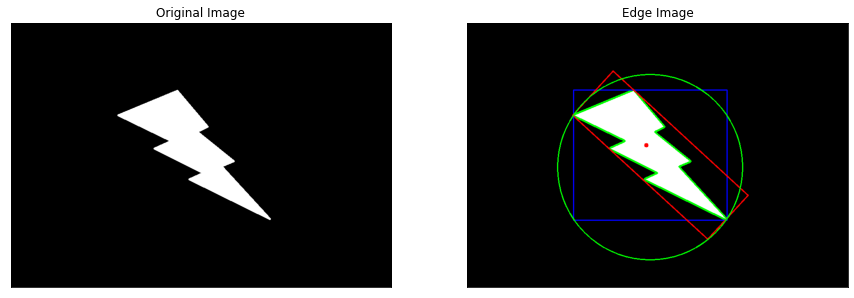

In [72]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
im = cv2.imread('kk1.png')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
img=im.copy()
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(imgray,250,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contours, -1, (0,255,0), 3)

cnt = contours[0]
M = cv2.moments(cnt)
k = cv2.isContourConvex(cnt)
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img = cv2.drawContours(img,[box],0,(255,0,0),2)

(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img = cv2.rectangle(img,(cx,cy),(cx,cy),(255,0,0),10)

area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

print(area,perimeter,approx)



plt.figure(figsize=(15,15), facecolor='white')

plt.subplot(121),plt.imshow(im)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(img)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

[(0, 4), (1, 468), (2, 1), (3, 5), (4, 2), (5, 148)]


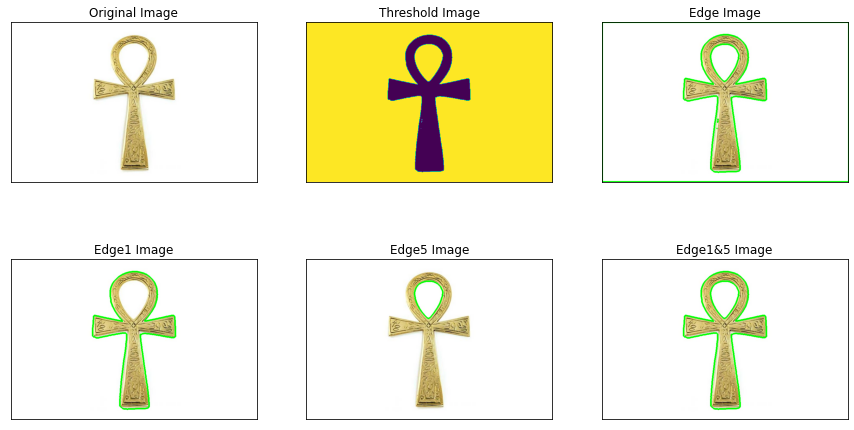

In [92]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
im = cv2.imread('pp2.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
img=im.copy()
img0 = im.copy()
img1 = im.copy()
img2 = im.copy()
img3 = im.copy()
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,240,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, #cv2.THRESH_BINARY, 11, 2)

kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contours, -1, (0,255,0), 3)


cnt = contours[0]
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)
 
size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))
print(size)
    
img1 = cv2.drawContours(img1, contours, 1, (0,255,0), 3)
img2 = cv2.drawContours(img2, contours, 5, (0,255,0), 3)

img3 = cv2.drawContours(img3, contours, 1, (0,255,0), 3)
img3 = cv2.drawContours(img3, contours, 5, (0,255,0), 3)

plt.figure(figsize=(15,8), facecolor='white')

plt.subplot(231),plt.imshow(im)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(232),plt.imshow(thresh)
plt.title('Threshold Image'), plt.xticks([]), plt.yticks([])

plt.subplot(233),plt.imshow(img)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.subplot(234),plt.imshow(img1)
plt.title('Edge1 Image'), plt.xticks([]), plt.yticks([])

plt.subplot(235),plt.imshow(img2)
plt.title('Edge5 Image'), plt.xticks([]), plt.yticks([])

plt.subplot(236),plt.imshow(img3)
plt.title('Edge1&5 Image'), plt.xticks([]), plt.yticks([])

plt.show()